In [1]:
import numpy as np
import pandas as pd
import calendar

In [2]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
temp = df["y"].map(dict(yes=1, no=0))
df.drop("y", 1, inplace=True)
df.insert(0, "y", temp)

df.head(10)

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1
5,0,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1
6,0,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1
7,0,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1
8,0,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1
9,0,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1


## Feature Extraction
#### At first glance, there are two features that I wish to extract:
- Explicit feature of whether balance is negative or positive, so that it isn't lost by normalization
- Circular values for time features, such as day of month and month of year. Using sine and cosine values representing time fetaures that loop back to their beginning, we can capture that beggining and end of sequences are in fact close. January is in fact close to December.

In [4]:
# Is balance negative
df["neg_balance"] = df["balance"] < 0

In [5]:
# Convert textual month data to integers 1-12
month_map = {m.lower(): i for i, m in enumerate(calendar.month_abbr)}
df["month"] = df["month"].apply(lambda x: month_map[x])

df.head()

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,neg_balance
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,False
1,0,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,False
2,0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,False
3,0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,False
4,0,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,False


In [6]:
day_in_month = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31,
}

# Accumulate circular day features for each month seperately, Since each month has varying mount of days.
days_sin = pd.Series(dtype="float64")
days_cos = pd.Series(dtype="float64")

for month in day_in_month.keys():
    days = df[df["month"] == month]["day"]
    sin = np.sin((days - 1) * (2.0 * np.pi / day_in_month[month]))
    cos = np.cos((days - 1) * (2.0 * np.pi / day_in_month[month]))

    days_sin = pd.concat([days_sin, sin])
    days_cos = pd.concat([days_cos, cos])

days_sin.shape

(40000,)

In [7]:
df["days_sin"] = days_sin
df["days_cos"] = days_cos

df["month_sin"] = np.sin((df["month"] - 1) * (2.0 * np.pi / len(day_in_month)))
df["month_cos"] = np.cos((df["month"] - 1) * (2.0 * np.pi / len(day_in_month)))

df.drop(["day", "month"], 1, inplace=True)
df.head(20)

,y,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,neg_balance,days_sin,days_cos,month_sin,month_cos
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,False,0.724793,0.688967,0.866025,-0.5
1,0,44,technician,single,secondary,no,29,yes,no,unknown,151,1,False,0.724793,0.688967,0.866025,-0.5
2,0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,False,0.724793,0.688967,0.866025,-0.5
3,0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,False,0.724793,0.688967,0.866025,-0.5
4,0,33,unknown,single,unknown,no,1,no,no,unknown,198,1,False,0.724793,0.688967,0.866025,-0.5
5,0,35,management,married,tertiary,no,231,yes,no,unknown,139,1,False,0.724793,0.688967,0.866025,-0.5
6,0,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,False,0.724793,0.688967,0.866025,-0.5
7,0,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,380,1,False,0.724793,0.688967,0.866025,-0.5
8,0,58,retired,married,primary,no,121,yes,no,unknown,50,1,False,0.724793,0.688967,0.866025,-0.5
9,0,43,technician,single,secondary,no,593,yes,no,unknown,55,1,False,0.724793,0.688967,0.866025,-0.5


In [8]:
df.nunique()

y                 2
age              70
job              12
marital           3
education         4
default           2
balance        6849
housing           2
loan              2
contact           3
duration       1535
campaign         48
neg_balance       2
days_sin         75
days_cos         69
month_sin        11
month_cos        11
dtype: int64

In [9]:
df.describe()

,y,age,balance,duration,campaign,days_sin,days_cos,month_sin,month_cos
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04
mean,0.072400,40.544600,1274.277550,254.824300,2.882175,0.019691,-0.102447,0.309138,-4.164609e-01
std,0.259152,9.641776,2903.769716,259.366498,3.239051,0.696673,0.709781,0.614028,5.949636e-01
min,0.000000,19.000000,-8019.000000,0.000000,1.000000,-0.998717,-1.000000,-1.000000,-1.000000e+00
25%,0.000000,33.000000,54.000000,100.000000,1.000000,-0.651372,-0.809017,0.000000,-8.660254e-01
50%,0.000000,39.000000,407.000000,175.000000,2.000000,-0.101168,-0.250653,0.500000,-5.000000e-01
75%,0.000000,48.000000,1319.000000,313.000000,3.000000,0.743145,0.669131,0.866025,6.123234e-17
max,1.000000,95.000000,102127.000000,4918.000000,63.000000,0.998717,1.000000,1.000000,1.000000e+00


## Preprocess
We split our train and test sets, normalize the numeric features, and one-hot encode categoricals.
One-hot encoding is picked since the dataset is small, and categories aren't wide anyways. We can afford the performance hit of one-hot encoding. Even binary features are one-hot encoded, to better visualize which value is actually important.

In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

print(train_data.shape)
print(test_data.shape)

(32000, 17)
(8000, 17)


In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric = [
    "age",
    "balance",
    "duration",
    "campaign",
    "days_sin",
    "days_cos",
    "month_sin",
    "month_cos",
]
categorical = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "neg_balance",
]

one_hot = OneHotEncoder(handle_unknown="ignore", sparse=False)

one_hot.fit(df[categorical])
one_hot.categories_

[array(['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array([False,  True])]

In [12]:
categorical_features_train = one_hot.transform(train_data[categorical])
categorical_features_test = one_hot.transform(test_data[categorical])

categorical_features_train.shape, categorical_features_test.shape

((32000, 30), (8000, 30))

In [13]:
normalize = StandardScaler()
normalize.fit(df[numeric])

numeric_features_train = normalize.transform(train_data[numeric])
numeric_features_test = normalize.transform(test_data[numeric])
numeric_features_train.shape, numeric_features_test.shape

((32000, 8), (8000, 8))

In [14]:
train_features = np.concatenate(
    (numeric_features_train, categorical_features_train), axis=1
)
test_features = np.concatenate(
    (numeric_features_test, categorical_features_test), axis=1
)

train_features.shape, test_features.shape

((32000, 38), (8000, 38))

#### Name the one-hot encoded features with format: 
_categoricalname\_categoricalvalue_

Also maintain a list of lists for the new categorical features, for feature importance graphs

In [15]:
# name new features
expanded_features = numeric.copy()
grouped_features = numeric.copy()
one_hot_features = [
    [f"{feature}_{c}" for c in cats]
    for feature, cats in zip(categorical, one_hot.categories_)
]
for new_features in one_hot_features:
    expanded_features.extend(new_features)

grouped_features.extend(one_hot_features)
expanded_features

['age',
 'balance',
 'duration',
 'campaign',
 'days_sin',
 'days_cos',
 'month_sin',
 'month_cos',
 'job_admin',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'neg_balance_False',
 'neg_balance_True']

In [16]:
train_label, test_label = np.array(train_data["y"]), np.array(test_data["y"])
train_label.shape, test_label.shape

((32000,), (8000,))

## Model training and validation
I have tried a couple sklearn models in a naive manner, and found that *GradientBoosting* is a top contender. Since it also allows for strong feature importance insights, I decided to use it.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
# Try GradientBoosting with deafult parameters
grad_clf = GradientBoostingClassifier()
rand_scores = cross_val_score(grad_clf, train_features, train_label, cv=5)
rand_mean = rand_scores.mean()

y_predict = cross_val_predict(grad_clf, train_features, train_label, cv=5)
print(f"Gradient Boost accuracy is {accuracy_score(train_label, y_predict)}")

print(confusion_matrix(train_label, y_predict))

Gradient Boost accuracy is 0.9356875
[[29146   534]
 [ 1524   796]]


In [19]:
grad_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
from sklearn.model_selection import GridSearchCV

params = dict(
    max_depth=[3, 5, 7, 10],
    n_estimators=[20, 50, 100, 200],
)

clf = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=-1,
)

clf.fit(train_features, train_label)

print(clf.best_score_)
hypers = clf.best_params_
hypers

0.9379687499999999


{'max_depth': 5, 'n_estimators': 100}

In [21]:
from sklearn.metrics import accuracy_score, roc_auc_score

final_clf = GradientBoostingClassifier(**hypers)

final_clf.fit(train_features, train_label)

test_predict = final_clf.predict(test_features)
print(f"The final accuracy is: {accuracy_score(test_label, test_predict)}")

The final accuracy is: 0.938875


## Feature Importance
A plot encompassing all features reveals that numeric features are much more significant than categorical ones.
Last call duration is by far the most important feature. Followed by the circular time features. 
I believe time features can be augmented further, deriving more seasonality. Without a year value, day of week cannot be calculated. And I don't have much time to deep dive into more features.

Categorical and numerical features are also plotted individually, to reveal which value is a stronger signal

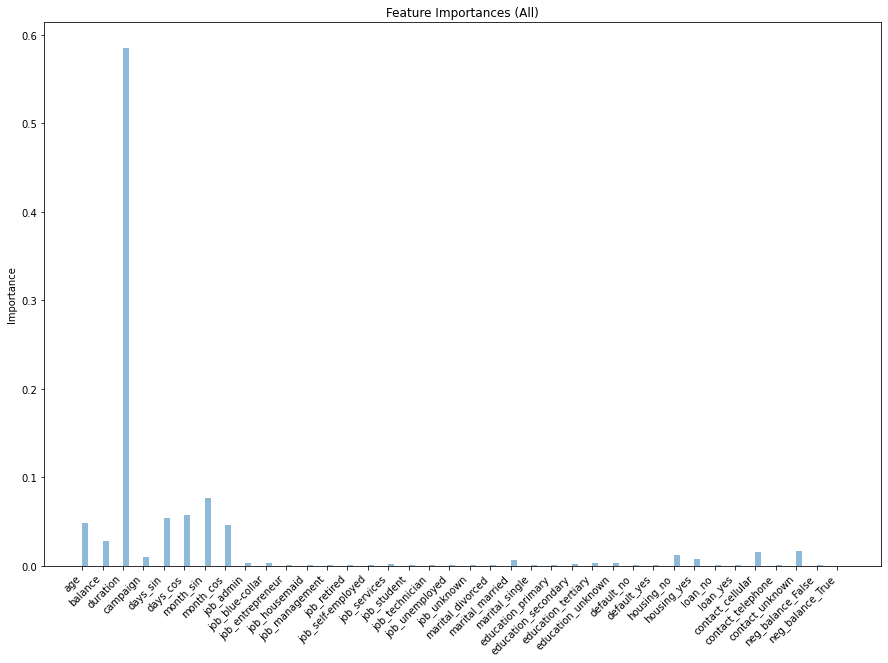

In [22]:
# Calculate feature importance
import matplotlib.pyplot as plt

f_imp = final_clf.feature_importances_

y_pos = np.arange(len(expanded_features))

plt.figure(figsize=(15, 10)) 

plt.bar(y_pos, f_imp, align='edge', width=0.3, alpha=0.5)
plt.xticks(y_pos, expanded_features, rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Feature Importances (All)')

plt.show()

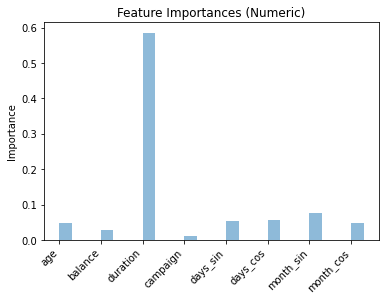

In [23]:
# Numerical features

y_pos = np.arange(len(numeric))

plt.bar(y_pos, f_imp[:len(numeric)], align='edge', width=0.3, alpha=0.5)
plt.xticks(y_pos, expanded_features[:len(numeric)], rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Feature Importances (Numeric)')

plt.show()

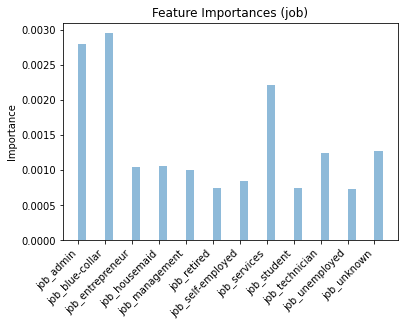

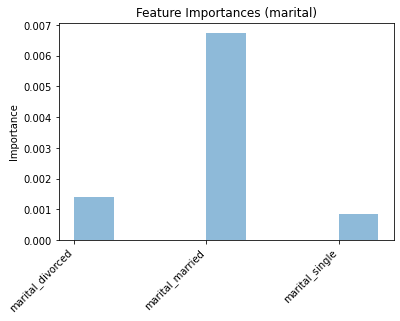

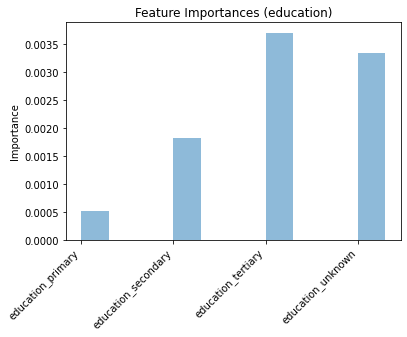

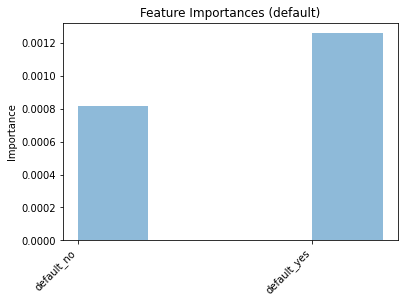

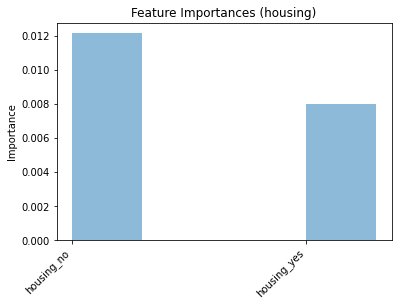

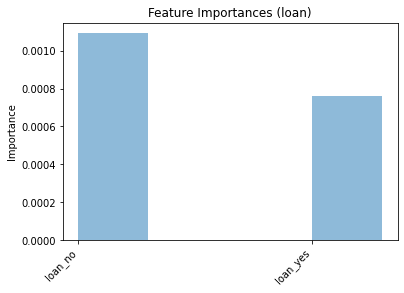

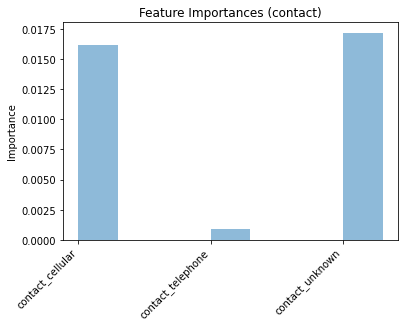

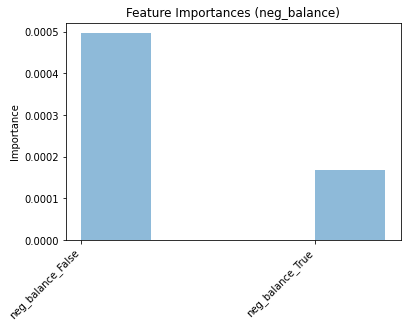

In [24]:
current_index = len(numeric)

for name, subcats in zip(categorical, grouped_features[len(numeric):]):
    next_index = current_index + len(subcats)

    cat_importances = f_imp[current_index:next_index]

    y_pos = np.arange(len(subcats))

    plt.bar(y_pos, cat_importances, align='edge', width=0.3, alpha=0.5)
    plt.xticks(y_pos, subcats, rotation=45, ha='right')
    plt.ylabel('Importance')
    plt.title(f'Feature Importances ({name})')

    plt.show()
    current_index = next_index